## Introduction
---
- We have a dataset containing information about a mall's customers and their spending scores.
- The goal is to cluster the customers based on their features.

- Our dataset contains:
    - CustomerID : ID assigned to the customer
    - Gender : Gender of the customer
    - Age : Age of the customer
    - Annual Income (k$) : Annual Income of the customer
    - Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

## Initial libraries and functions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

## Exploratory data analysis (EDA)
---
- Dataset looks clean, doesn't require cleaning that much.

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum(), df.duplicated().sum()

(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
 0)

### Proprocessing
- Dropping `customerID`
- Renaming fields for easier access
- Changing types to float64

In [5]:
df.drop('CustomerID', axis='columns', inplace=True)

df.rename(
    {
        'Annual Income (k$)' : 'income',
        'Spending Score (1-100)' : 'score'
    },
    axis='columns',
    inplace=True
)
df.rename(str.lower, axis='columns', inplace=True)

df[['age', 'income', 'score']] = df[['age', 'income', 'score']].astype('float64')

df.head()

,gender,age,income,score
0,Male,19.0,15.0,39.0
1,Male,21.0,15.0,81.0
2,Female,20.0,16.0,6.0
3,Female,23.0,16.0,77.0
4,Female,31.0,17.0,40.0


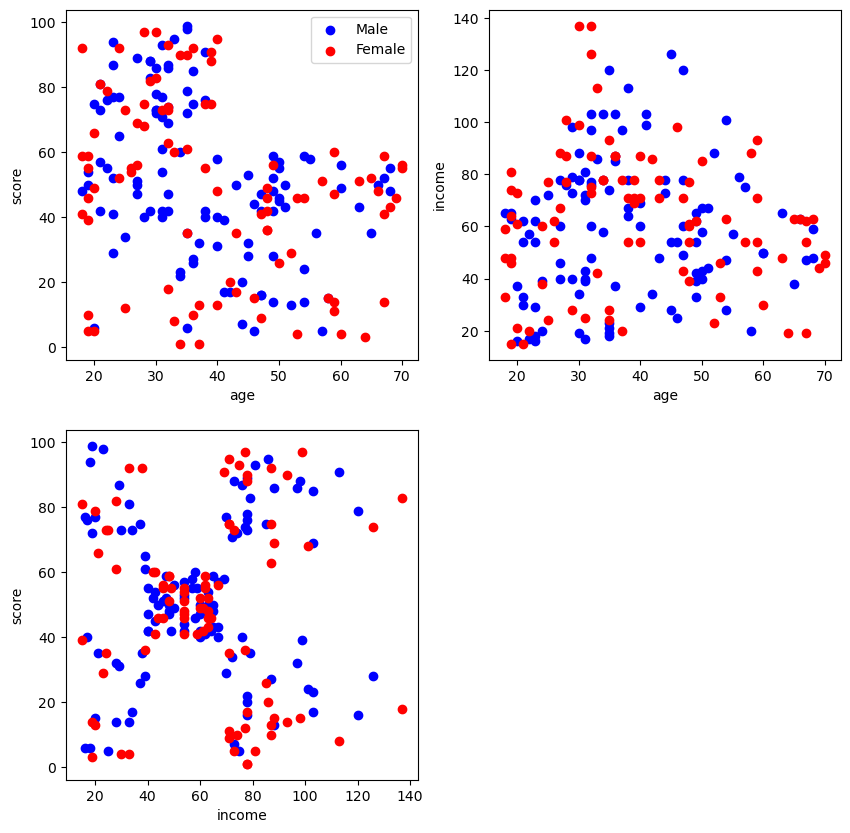

In [6]:
# I thought gender might affect the clustering, but it seems I may be wrong. However, it still needs to be proven.
females, males = df[df.gender == 'Female'], df[df.gender == 'Male']

fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1, xlabel='age', ylabel='score')
plt.scatter(females.age, females.score, c='b')
plt.scatter(males.age, males.score, c='r')
plt.legend(['Male', 'Female'])

plt.subplot(2, 2, 2, xlabel='age', ylabel='income')
plt.scatter(females.age, females.income, c='b')
plt.scatter(males.age, males.income, c='r')

plt.subplot(2, 2, 3, xlabel='income', ylabel='score')
plt.scatter(females.income, females.score, c='b')
plt.scatter(males.income, males.score, c='r')

### Proprocessing

In [7]:
df.gender = LabelEncoder().fit(['Female', 'Male']).transform(df.values[:, 0])

X = df

X_scaled = MinMaxScaler().fit_transform(X)

X[:5], X_scaled[:5]

(   gender   age  income  score
 0       1  19.0    15.0   39.0
 1       1  21.0    15.0   81.0
 2       0  20.0    16.0    6.0
 3       0  23.0    16.0   77.0
 4       0  31.0    17.0   40.0,
 array([[1.        , 0.01923077, 0.        , 0.3877551 ],
        [1.        , 0.05769231, 0.        , 0.81632653],
        [0.        , 0.03846154, 0.00819672, 0.05102041],
        [0.        , 0.09615385, 0.00819672, 0.7755102 ],
        [0.        , 0.25      , 0.01639344, 0.39795918]]))

### Training our model and describing it

In [8]:
clusters = 4
agglom_model = AgglomerativeClustering(n_clusters = clusters, linkage = 'complete').fit(X_scaled)

df['cluster'] = agglom_model.labels_

In [9]:
df.groupby('cluster').describe().T

cluster                0           1          2           3
gender count   53.000000   78.000000  35.000000   34.000000
       mean     1.000000    0.000000   1.000000    0.000000
       std      0.000000    0.000000   0.000000    0.000000
       min      1.000000    0.000000   1.000000    0.000000
       25%      1.000000    0.000000   1.000000    0.000000
       50%      1.000000    0.000000   1.000000    0.000000
       75%      1.000000    0.000000   1.000000    0.000000
       max      1.000000    0.000000   1.000000    0.000000
age    count   53.000000   78.000000  35.000000   34.000000
       mean    29.245283   41.794872  55.800000   29.617647
       std      7.575024   13.169582   9.538775    5.164064
       min     18.000000   18.000000  35.000000   20.000000
       25%     22.000000   31.250000  48.000000   24.750000
       50%     30.000000   43.500000  57.000000   30.000000
       75%     35.000000   50.000000  64.500000   32.750000
       max     43.000000   68.000000  70.000000   38.000000
income count   53.000000   78.000000  35.000000   34.000000
       mean    67.603774   57.628205  54.085714   62.970588
       std     28.801936   22.893377  20.826131   32.132760
       min     15.000000   16.000000  19.000000   16.000000
       25%     48.000000   42.250000  43.000000   30.750000
       50%     71.000000   57.500000  54.000000   75.000000
       75%     86.000000   67.000000  63.000000   84.000000
       max    137.000000  126.000000  98.000000  120.000000
score  count   53.000000   78.000000  35.000000   34.000000
       mean    57.264151   38.576923  35.257143   81.235294
       std     29.921147   15.646683  17.940003    8.893507
       min      1.000000    5.000000   3.000000   65.000000
       25%     41.000000   28.000000  15.000000   74.250000
       50%     61.000000   42.000000  41.000000   78.500000
       75%     81.000000   50.000000  48.500000   87.750000
       max     97.000000   61.000000  60.000000   99.000000

### Plotting the Segmentation Results of Our Model

In [10]:
dist_matrix = euclidean_distances(X_scaled, X_scaled) 

Z = hierarchy.linkage(squareform(dist_matrix, checks=False), 'complete')
Z[:5]

array([[6.50000000e+01, 6.80000000e+01, 1.92307692e-02, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 1.92307692e-02, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 2.32622442e-02, 2.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 2.66232876e-02, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 2.80413197e-02, 2.00000000e+00]])

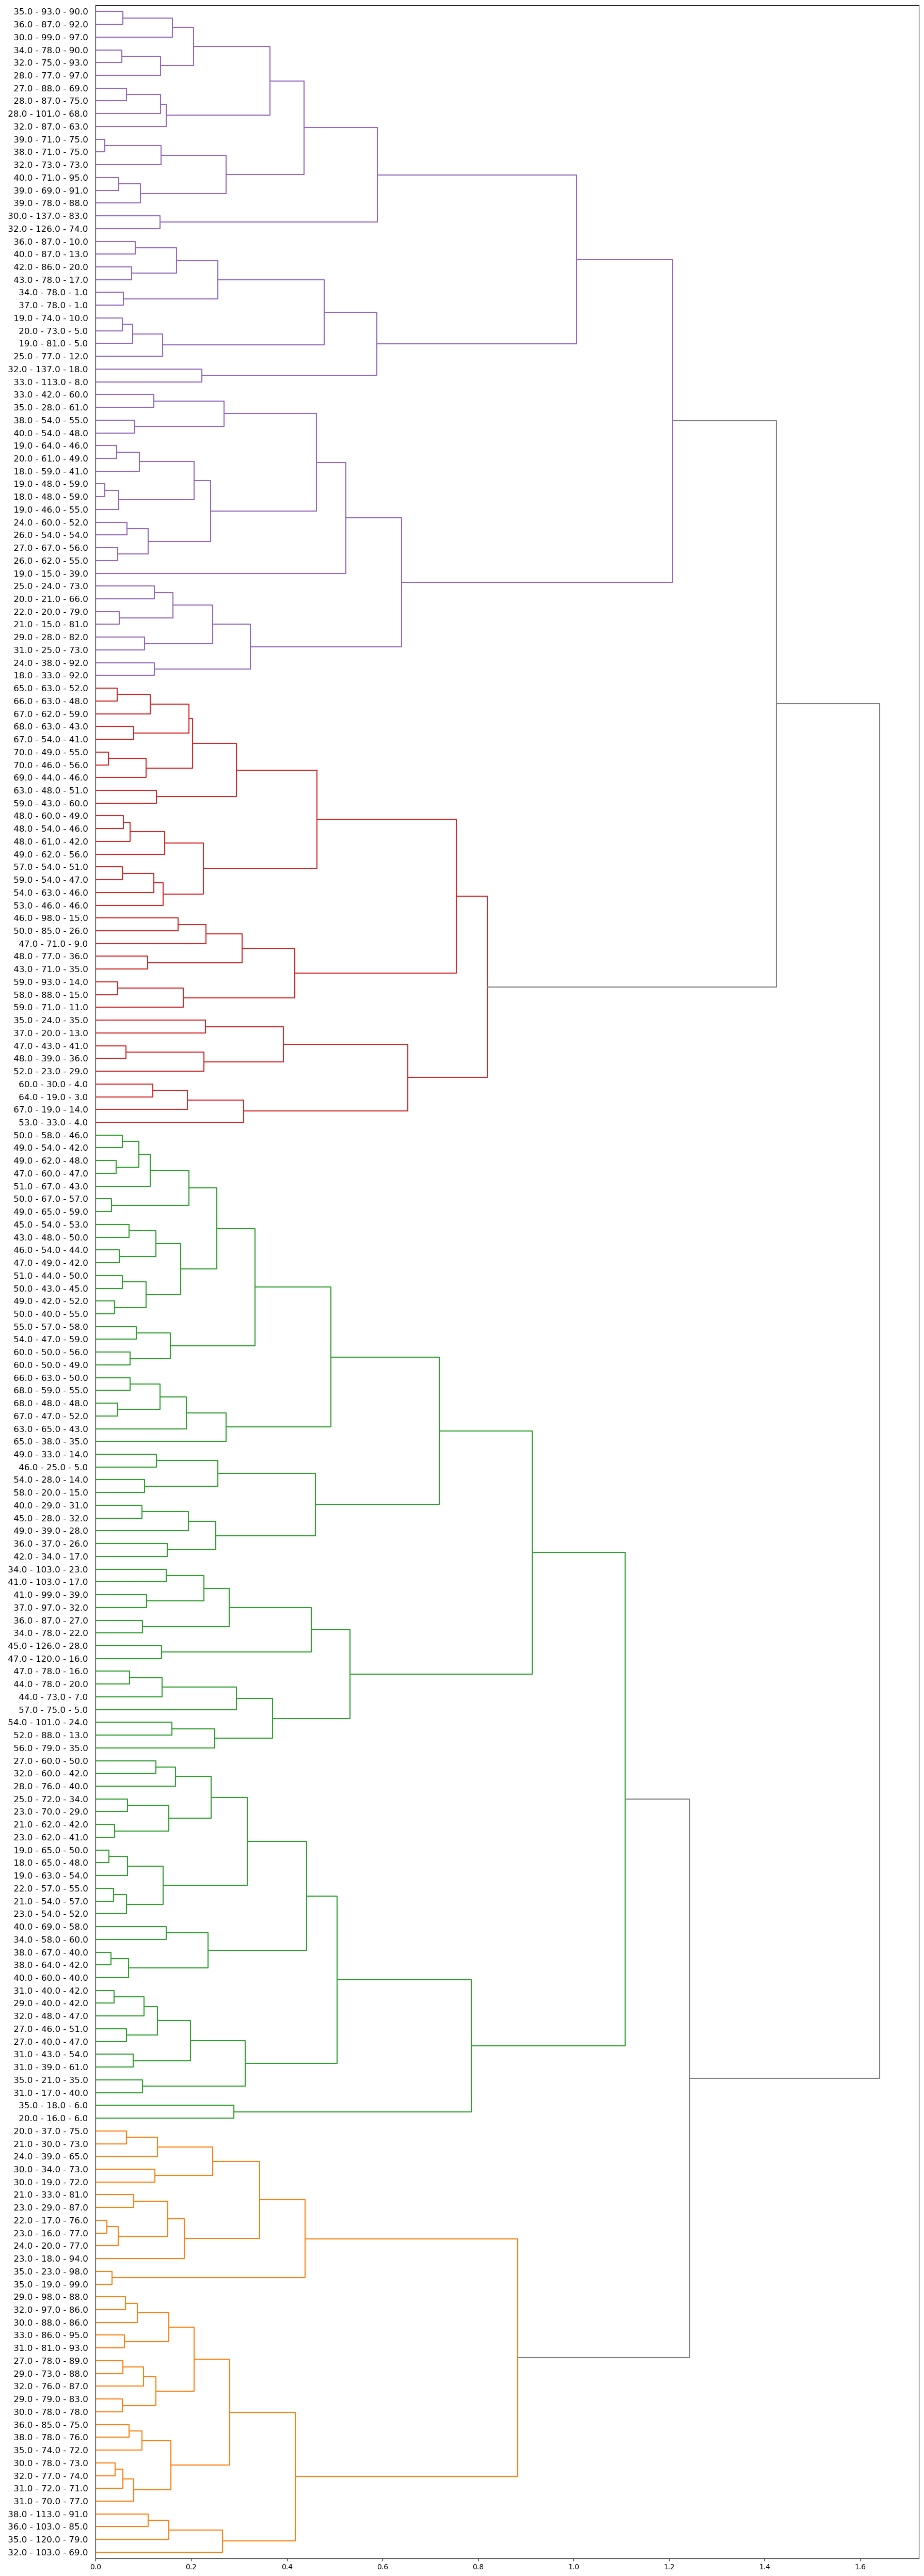

In [11]:
fig = plt.figure(figsize=(18,50))

dendro = hierarchy.dendrogram(
    Z,
    leaf_label_func= lambda i: f" { df['age'][i] } - { df['income'][i] } - { df['score'][i] } ",
    color_threshold=1.21, # To differentiate our clusters by color in the dendrogram.
    leaf_font_size=12,
    orientation='right',
    above_threshold_color='gray',
)
plt.tight_layout()

---
<center>
    <h3>
        <i>
            This concludes the notebook. Feel free to reach out with any questions or suggestions!
        </i>
    </h3>
</center>